In [1]:
! pip install scikit-learn seaborn

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
regresion_lineal = LinearRegression()

In [4]:
df = pd.read_csv('01_07_empleados.csv', delimiter=";")

In [5]:
print(df.head(20))

    Edad  Experiencia  Salario
0   22.0            3     2423
1   26.0            5     2639
2   35.0           10     3122
3   35.0           13     3431
4   54.0           18     3962
5   27.0            4     2564
6   24.0            6     2709
7   58.0           24     4532
8   20.0            1     1977
9   39.0            8     2953
10  24.0            6     2709
11  55.0           12     3306
12  22.0            4     2518
13   NaN           10     3194
14  31.0           11     3267
15   NaN           15     3635
16  34.0           11     3257
17  23.0            5     2695
18   NaN           24     4529
19   NaN           18     3907


In [6]:
print(df.isnull().sum())

Edad           46
Experiencia     0
Salario         0
dtype: int64


- La imputación de media, mediana o moda solo observa la distribución de los valores de la variable (columna) con entradas faltantes.
- Con la imputación de regresión, la información de otras variables se utiliza para predecir los valores faltantes mediante el uso de un modelo de regresión.
    - Se estima el modelo de regresión en los datos observados
    - Se predicen y reemplazan los valores faltantes

- Desafío: Utilizar la imputación de regresión para la columna de edad de nuestro dataframe, la cual contiene valores vacíos

In [7]:
df_dropna = df.dropna(axis=0, how='any')

In [8]:
matriz_correlacion = df_dropna.corr()
print(matriz_correlacion)

                 Edad  Experiencia   Salario
Edad         1.000000     0.742188  0.742474
Experiencia  0.742188     1.000000  0.992196
Salario      0.742474     0.992196  1.000000


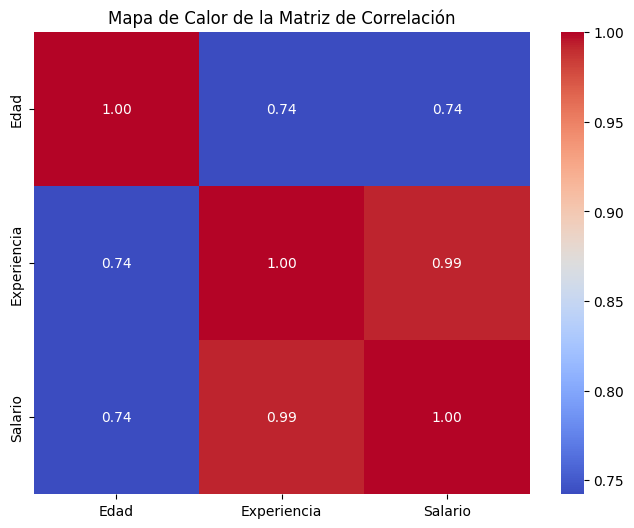

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

X = df_dropna[['Experiencia','Salario']]
y = df_dropna['Edad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

regresion_lineal.fit(X_train, y_train)

print(f"Intercept: {regresion_lineal.intercept_:.2f}")
print(f"Coefficients (Experiencia, Salario): {regresion_lineal.coef_}")

Intercept: 11.98
Coefficients (Experiencia, Salario): [0.73049699 0.00610583]


In [11]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = regresion_lineal.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # RMSE se calcula a partir del MSE
r2 = r2_score(y_test, y_pred)

print(f"Métricas de Evaluación del Modelo:")
print(f"  Error Absoluto Medio (MAE):   {mae:.2f}")
print(f"  Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"  Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"  Coeficiente de Determinación (R^2):   {r2:.4f}")

Métricas de Evaluación del Modelo:
  Error Absoluto Medio (MAE):   3.57
  Error Cuadrático Medio (MSE): 18.12
  Raíz del Error Cuadrático Medio (RMSE): 4.26
  Coeficiente de Determinación (R^2):   0.8480


In [12]:
df_na = df.query("Edad.isnull()")
print(df_na.head(20))

    Edad  Experiencia  Salario
13   NaN           10     3194
15   NaN           15     3635
18   NaN           24     4529
19   NaN           18     3907
20   NaN            5     2656
25   NaN            5     2676
29   NaN            6     2709
32   NaN            9     3027
33   NaN           10     3128
34   NaN           15     3614
35   NaN           25     4611
39   NaN           15     3656
47   NaN           30     5034
56   NaN            1     2095
57   NaN            2     2222
61   NaN           24     4545
65   NaN           27     4889
70   NaN            1     1929
75   NaN            8     2919
81   NaN            6     2774


In [13]:
edad_pred = regresion_lineal.predict(df_na[['Experiencia','Salario']])
edad_pred

array([38.78550768, 45.13066539, 57.16375382, 48.98294319, 31.84808409,
       31.97020076, 32.90219027, 37.03533643, 38.38252264, 45.00244288,
       58.39492919, 45.2588879 , 64.63018189, 25.5007233 , 27.0066612 ,
       57.26144716, 61.553345  , 24.48715487, 35.64540938, 33.29906948,
       58.64526838, 56.25618765, 38.3031468 , 53.04892517, 65.13086027,
       39.60759218, 42.43629296, 29.38573334, 47.88609616, 68.06946606,
       37.23072311, 64.21108243, 26.92728536, 40.16322307, 28.33552991,
       47.83724949, 65.57658615, 46.85030747, 57.08437798, 43.61862166,
       57.25534133, 36.05450025, 26.683052  , 46.67934412, 71.82405051,
       57.04774298])

In [14]:
df.loc[df["Edad"].isnull(), 'Edad'] = edad_pred

In [15]:
print(df.head(20))

         Edad  Experiencia  Salario
0   22.000000            3     2423
1   26.000000            5     2639
2   35.000000           10     3122
3   35.000000           13     3431
4   54.000000           18     3962
5   27.000000            4     2564
6   24.000000            6     2709
7   58.000000           24     4532
8   20.000000            1     1977
9   39.000000            8     2953
10  24.000000            6     2709
11  55.000000           12     3306
12  22.000000            4     2518
13  38.785508           10     3194
14  31.000000           11     3267
15  45.130665           15     3635
16  34.000000           11     3257
17  23.000000            5     2695
18  57.163754           24     4529
19  48.982943           18     3907
